# Maximal Graph Size

Even though the framework might be efficient in calculating, it is still bounded by
the memory limit. One might restructure the framework to use a database instead of
memory, but this also slows down computation by a bunch.
Is our case the biggest objects needed are the distance and predecessor matrices,
they are two $(n\times n)$ matrices, where $n$ is the number of nodes in the graph.
In our case we cannot just use sparse arrays, as we need all paths in the betweenness
calculation. In any case, for a short moment in time, we need to store the whole
matrix in memory. This means that the memory limits the maximal graph size.

The distances are calculated as `float64` values, before stored as `float32` values.
Function of the memory size, dependent on $n$:
\begin{align}
    \text{memory} &= 8\,\text{B} \cdot n^2 \\
                  &= 8\,\text{B} \cdot n^2 \cdot \frac{\text{GiB}}{1024^3\text{B}} \\
                  &= \frac{8 \cdot n^2}{1024^3}\,\text{GiB} \\
                n &= 2\sqrt{\frac{\text{memory}}{2\,\text{GiB}} \cdot 1024^3}
\end{align}
To convert bytes to GiB, remark that there are $1024^3$ bytes in a gibibyte (GiB).
For a $n=100,000$ graph, this is the following memory usage:

In [1]:
def memory_from_n(n):
    return 8 * n**2 / 1024**3
print(f"{memory_from_n(100_000):.2f} GiB")

74.51 GiB


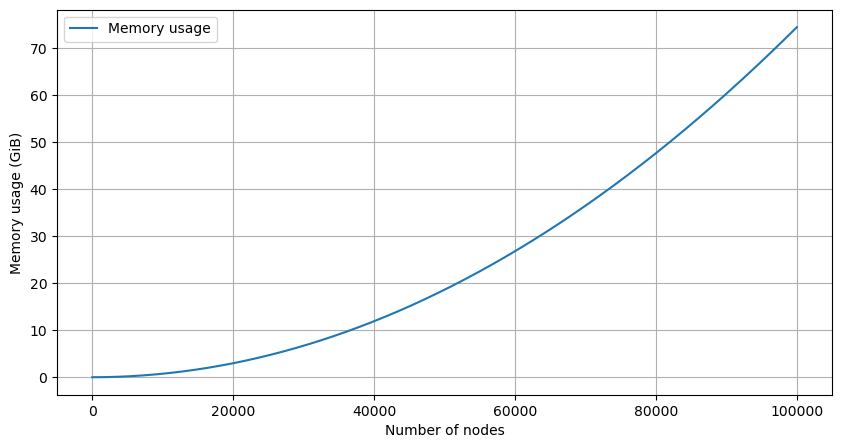

In [2]:
from matplotlib import pyplot as plt
import numpy as np
# Plotting the memory usage for different graph sizes:
n_lin = np.linspace(1, 100_000, 1000)
memory_lin = 8 * n_lin**2 / 1024**3
plt.plot(n_lin, memory_lin, figure=plt.figure(figsize=(10, 5)), label="Memory usage")
plt.xlabel("Number of nodes")
plt.ylabel("Memory usage (GiB)")
plt.legend()
plt.grid()
plt.show()

So if we want to bound the memory limit at 20 GiB, we use the inverse function.

In [3]:
def n_from_memory(memory):
    return int(np.sqrt(1024**3 * memory / 8))
n_from_memory(74.5)

99996

In [6]:
n_from_memory(1), n_from_memory(3), n_from_memory(5), n_from_memory(10), n_from_memory(20)

(11585, 20066, 25905, 36635, 51810)

We will settle with a max of 20,000 nodes.

In [9]:
print(f"{memory_from_n(20_000):.2f} GiB")

3.61 GiB


This means we need to at least work with the double in memory, with the distance and
predecessor matrix. Additionally, there is the graph object and its attributes.
When initializing a Partitioner, this can be set with the option `max_nodes` and
the default can be set in the `config.py` file.